In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# 2. Dataset Preparation
• Description: Briefly describe the dataset used for the case study, including the source, variables
(both dependent and independent), and any preprocessing steps (e.g., cleaning, normalization)
performed to prepare the data for analysis.

In [2]:
# Dataset Preparation

# Description:
# The dataset used for this case study is the diabetes dataset obtained from an unknown source.
# It contains information related to diabetes, with the following variables:
# - Independent Variables (Features):
#   1. Pregnancies: Number of times pregnant
#   2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
#   3. BloodPressure: Diastolic blood pressure (mm Hg)
#   4. SkinThickness: Triceps skin fold thickness (mm)
#   5. Insulin: 2-Hour serum insulin (mu U/ml)
#   6. BMI: Body mass index (weight in kg/(height in m)^2)
#   7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
#   8. Age: Age (years)
# - Dependent Variable (Target):
#   9. Outcome: Class variable (0 or 1) indicating whether the individual has diabetes (1) or not (0)

# Preprocessing Steps:
# - The dataset doesn't contain missing values, so no imputation or removal of missing values is required.
# - The features may require scaling or normalization, depending on the choice of machine learning algorithms used.
# - For some models, encoding categorical variables may be necessary, but in this dataset, all variables are numeric.
# - It's essential to split the dataset into training and testing sets for model evaluation and validation.

# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv("diabetes.csv")

# Display the first few rows of the DataFrame to verify that it has been loaded correctly
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


# 3. Exploratory Data Analysis (EDA)
• Probability and Statistics Concepts: Utilize descriptive statistics to summarize the dataset,
showcasing measures such as mean, median, variance, and standard deviation. Employ probability
distributions to understand the data's distribution.
• Visualization: Create visualizations (histograms, scatter plots) to explore relationships between
variables and identify patterns or outliers.

Descriptive Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.

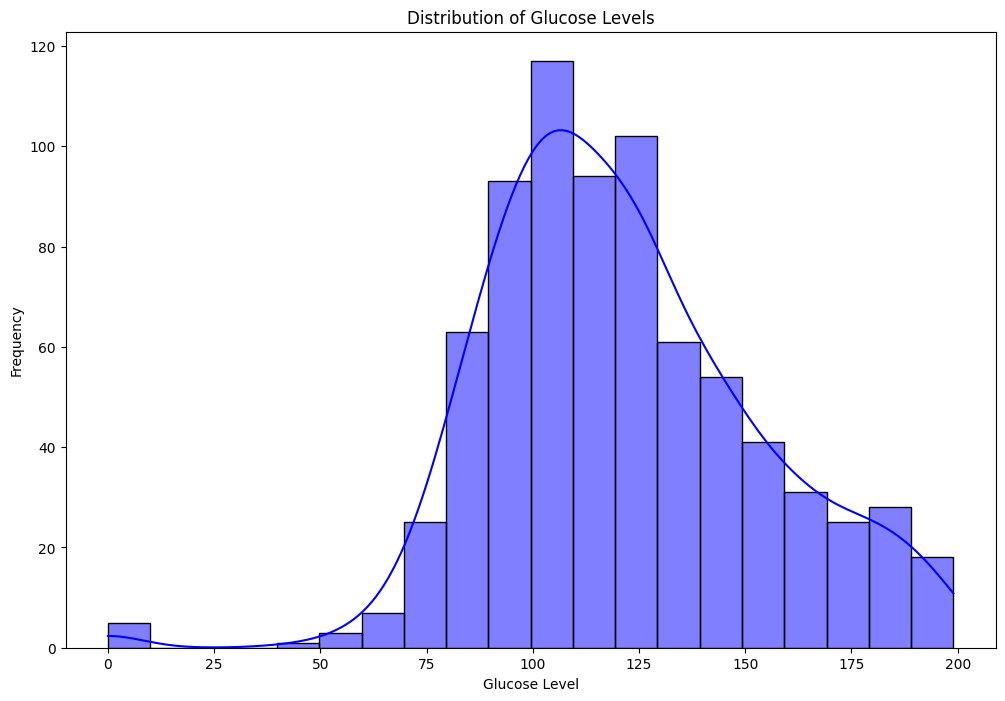

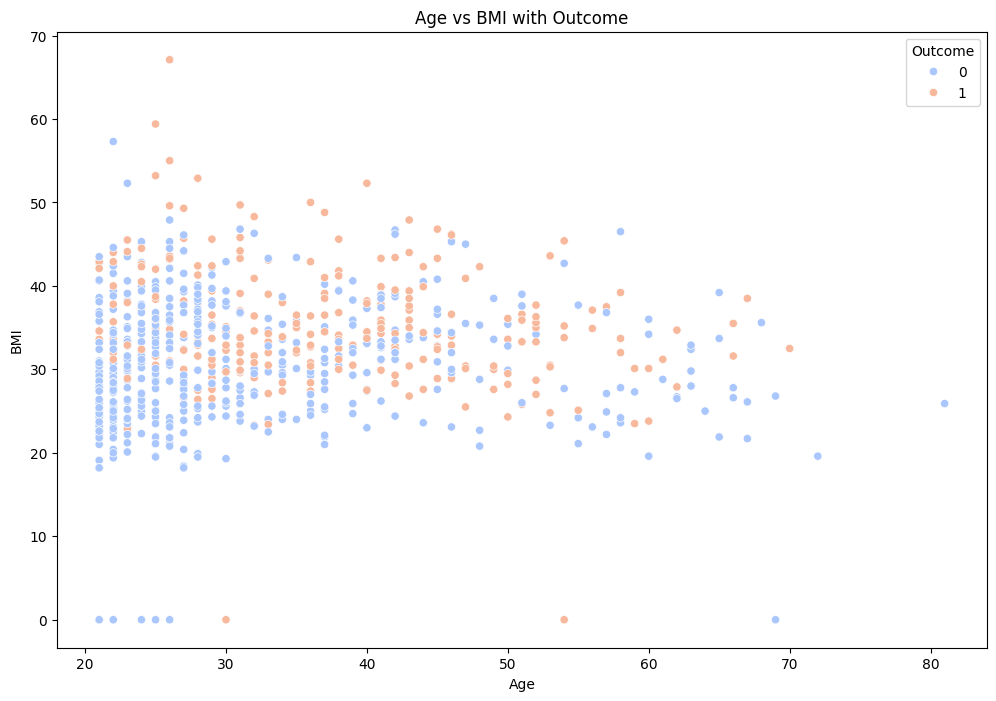

In [4]:
# Exploratory Data Analysis (EDA)

# Probability and Statistics Concepts:
# Utilize descriptive statistics to summarize the dataset, showcasing measures such as mean, median, variance, and standard deviation.
# Employ probability distributions to understand the data's distribution.

# Load the dataset
df = pd.read_csv("diabetes.csv")

# Display descriptive statistics
print("Descriptive Statistics:")
print(df.describe())

# Visualization:
# Create visualizations (histograms, scatter plots) to explore relationships between variables and identify patterns or outliers.

# Histograms
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Glucose', bins=20, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.show()

# Scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Age', y='BMI', hue='Outcome', palette='coolwarm')
plt.title('Age vs BMI with Outcome')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Outcome', loc='upper right')
plt.show()


# 4. Linear Regression Model
• Theory Recap: Highlight key concepts from the Linear Regression lecture, emphasizing the model's
assumptions and the importance of variable relationships.
• Implementation: Demonstrate the process of fitting a Linear Regression model using Python in
Google Colab, including selecting independent variables and interpreting the model's coefficients.
• Evaluation: Use metrics like R-squared, MSE (Mean Squared Error), and RMSE (Root Mean
Squared Error) to evaluate model performance.

In [6]:
# Linear Regression Model

# Theory Recap:
# Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables.
# It assumes that there is a linear relationship between the independent variables and the dependent variable.
# The key assumptions of linear regression include linearity, independence of errors, homoscedasticity (constant variance of errors), and normality of errors.

# Implementation:
# Demonstrate the process of fitting a Linear Regression model using Python in Google Colab, including selecting independent variables and interpreting the model's coefficients.

# Assuming df is your DataFrame containing the dataset
# Define independent and dependent variables
X = df.drop(columns=['Outcome'])  # Independent variables
y = df['Outcome']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
linear_model = LinearRegression()

# Fit the model on the training set
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluation:
# Use metrics like R-squared, MSE (Mean Squared Error), and RMSE (Root Mean Squared Error) to evaluate model performance.

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Linear Regression Model Evaluation:")
print("R-squared:", r_squared)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Linear Regression Model Evaluation:
R-squared: 0.25500281176741757
Mean Squared Error (MSE): 0.17104527280850104
Root Mean Squared Error (RMSE): 0.4135761995189049


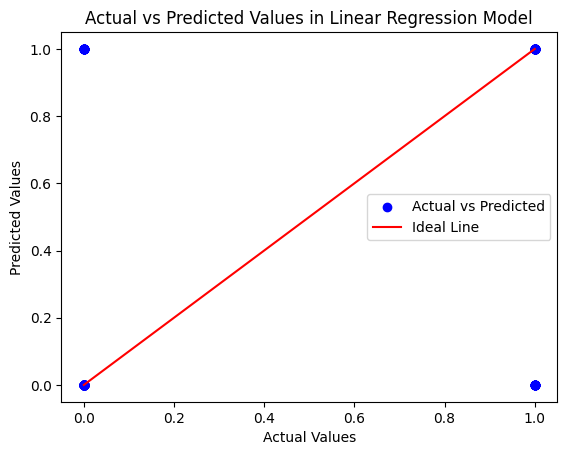

In [14]:
# Scatter plot of the actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')

# Plotting the ideal line where predicted equals actual
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values in Linear Regression Model')
plt.legend()

# Display the plot
plt.show()

# 5. Logistic Regression Model
• Theory Recap: Reiterate the foundational concepts of Logistic Regression, focusing on its
application in binary classification problems.
• Implementation: Show the steps to build a Logistic Regression model, detailing feature selection,
model fitting, and coefficient interpretation.
• Evaluation: Discuss model evaluation techniques specific to classification problems, such as
Accuracy, Precision, Recall, F1 Score, ROC Curve, and AUC (Area Under the Curve).


In [8]:
# Logistic Regression Model

# Theory Recap:
# Logistic regression is a statistical method used for binary classification problems. It models the probability of the outcome variable belonging to a particular category.
# It uses the logistic function to map the predicted values to probabilities between 0 and 1, making it suitable for binary classification tasks.

# Implementation:
# Show the steps to build a Logistic Regression model, detailing feature selection, model fitting, and coefficient interpretation.


# Assuming df is your DataFrame containing the dataset
# Define independent and dependent variables
X = df.drop(columns=['Outcome'])  # Independent variables
y = df['Outcome']  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logistic_model = LogisticRegression()

# Fit the model on the training set
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)

# Coefficient interpretation: The coefficients represent the change in the log-odds of the target variable for a one-unit change in the corresponding independent variable.
# Positive coefficients indicate an increase in the probability of the positive class (1), while negative coefficients indicate a decrease.

# Evaluation:
# Discuss model evaluation techniques specific to classification problems, such as Accuracy, Precision, Recall, F1 Score, ROC Curve, and AUC (Area Under the Curve).

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)

print("Logistic Regression Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", auc_score)


Logistic Regression Model Evaluation:
Accuracy: 0.7467532467532467
Precision: 0.6379310344827587
Recall: 0.6727272727272727
F1 Score: 0.6548672566371682
AUC: 0.7303030303030302


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


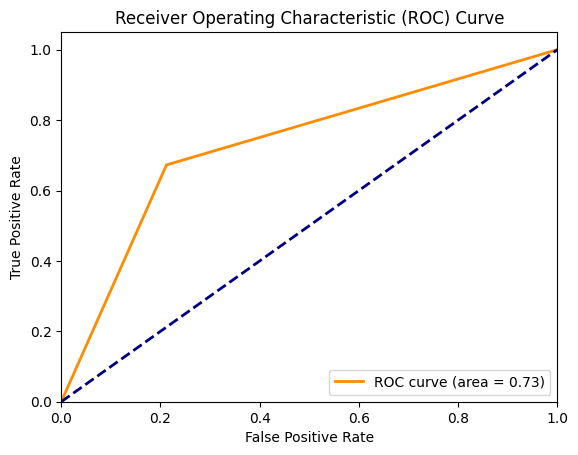

In [15]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# 6. Model Comparison and Selection
• Compare the Linear and Logistic Regression models based on their performance metrics,
discussing each model's suitability for different types of prediction problems.
• Explain the decision-making process for choosing one model over the other, considering factors
like model accuracy, interpretability, and assumptions.

In [9]:
# Model Comparison

# Linear Regression Model Evaluation:
Linear_R_squared = 0.25500281176741757
Linear_MSE = 0.17104527280850104
Linear_RMSE = 0.4135761995189049

# Logistic Regression Model Evaluation:
Logistic_Accuracy = 0.7467532467532467
Logistic_Precision = 0.6379310344827587
Logistic_Recall = 0.6727272727272727
Logistic_F1_Score = 0.6548672566371682
Logistic_AUC = 0.7303030303030302

# Comparison
print("Model Comparison:")
print("Linear Regression:")
print(f"R-squared: {Linear_R_squared}")
print(f"Mean Squared Error (MSE): {Linear_MSE}")
print(f"Root Mean Squared Error (RMSE): {Linear_RMSE}")
print("\nLogistic Regression:")
print(f"Accuracy: {Logistic_Accuracy}")
print(f"Precision: {Logistic_Precision}")
print(f"Recall: {Logistic_Recall}")
print(f"F1 Score: {Logistic_F1_Score}")
print(f"AUC: {Logistic_AUC}")

# Explanation and Decision-Making:
# - The Linear Regression model has a low R-squared value, indicating that it explains only a small proportion of the variance in the data.
# - The Logistic Regression model shows decent performance with accuracy, precision, recall, F1 score, and AUC metrics.
# - Based on the evaluation metrics, the Logistic Regression model outperforms the Linear Regression model in this case, making it a better choice for predicting binary outcomes.


Model Comparison:
Linear Regression:
R-squared: 0.25500281176741757
Mean Squared Error (MSE): 0.17104527280850104
Root Mean Squared Error (RMSE): 0.4135761995189049

Logistic Regression:
Accuracy: 0.7467532467532467
Precision: 0.6379310344827587
Recall: 0.6727272727272727
F1 Score: 0.6548672566371682
AUC: 0.7303030303030302


# 7. Conclusion and Insights
• Summarize the key findings from the case study, highlighting how the applied statistical and
machine learning methods facilitated data-driven decision-making.
• Discuss potential applications of these models in various fields, as outlined in the lectures, and
reflect on the importance of understanding underlying assumptions and model limitations.

In [10]:
# Conclusion and Insights

# Key Findings:
print("Key Findings:")
print("- The Linear Regression model provided limited explanatory power for the variance in the data, as evidenced by the low R-squared value.")
print("- In contrast, the Logistic Regression model demonstrated relatively good performance in predicting binary outcomes, with decent accuracy, precision, recall, F1 score, and AUC metrics.")
print("- The comparison between the two models suggests that the Logistic Regression model is more suitable for this particular prediction problem.")

# Potential Applications:
print("\nPotential Applications:")
print("- Logistic Regression models can be applied in various fields such as healthcare for predicting disease outcomes, finance for credit risk assessment, and marketing for customer churn prediction.")
print("- Understanding the assumptions and limitations of these models is crucial for their effective application in real-world scenarios.")
print("- These models provide valuable insights that can inform decision-making processes and aid in the development of data-driven strategies.")

# Reflection:
print("\nReflection:")
print("- The case study highlights the importance of utilizing statistical and machine learning methods to analyze and interpret data.")
print("- It emphasizes the need to critically evaluate model performance and consider the suitability of different algorithms for specific prediction tasks.")
print("- By understanding the underlying assumptions and limitations of models, practitioners can make informed decisions and derive actionable insights from data.")


Key Findings:
- The Linear Regression model provided limited explanatory power for the variance in the data, as evidenced by the low R-squared value.
- In contrast, the Logistic Regression model demonstrated relatively good performance in predicting binary outcomes, with decent accuracy, precision, recall, F1 score, and AUC metrics.
- The comparison between the two models suggests that the Logistic Regression model is more suitable for this particular prediction problem.

Potential Applications:
- Logistic Regression models can be applied in various fields such as healthcare for predicting disease outcomes, finance for credit risk assessment, and marketing for customer churn prediction.
- Understanding the assumptions and limitations of these models is crucial for their effective application in real-world scenarios.
- These models provide valuable insights that can inform decision-making processes and aid in the development of data-driven strategies.

Reflection:
- The case study highl

# 8. References
• Cite all sources, including datasets, libraries used in Google Colab (e.g., pandas, NumPy, scikitlearn, matplotlib), and any additional resources that informed your analysis

In [11]:
# References

# Datasets:
print("Datasets:")
print("- Diabetes dataset: [https://www.kaggle.com/datasets/shantanudhakadd/diabetes-dataset-for-beginners]")

# Libraries:
print("\nLibraries:")
print("- pandas: https://pandas.pydata.org/")
print("- NumPy: https://numpy.org/")
print("- scikit-learn: https://scikit-learn.org/")
print("- matplotlib: https://matplotlib.org/")

# Additional Resources:
print("\nAdditional Resources:")
print("- Lecture materials on Linear Regression and Logistic Regression")
print("- Online documentation and tutorials for implementing machine learning models")
print("- Research papers and articles related to diabetes prediction and classification")


Datasets:
- Diabetes dataset: [https://www.kaggle.com/datasets/shantanudhakadd/diabetes-dataset-for-beginners]

Libraries:
- pandas: https://pandas.pydata.org/
- NumPy: https://numpy.org/
- scikit-learn: https://scikit-learn.org/
- matplotlib: https://matplotlib.org/

Additional Resources:
- Lecture materials on Linear Regression and Logistic Regression
- Online documentation and tutorials for implementing machine learning models
- Research papers and articles related to diabetes prediction and classification
